# Predict The Flight Ticket Price 
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

# Importing required libraries

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importing the train dataset 

In [2]:
data_train= pd.read_excel('Data_Train_flight.xlsx')

# Importing the test dataset

In [3]:
data_test=pd.read_excel('Test_set_Flight.xlsx')

# Merging the Train and Test dataset

In [4]:
data=pd.concat([data_train,data_test],axis=0,sort=False)

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [6]:
data.shape

(13354, 11)

# Enhancing the analysis by exploring the Date_of_Journey feature of the data set

In [7]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])

 >Splitting the date into day, months, year

In [8]:
data['Month']=data['Date_of_Journey'].dt.month_name()
data['year']=data['Date_of_Journey'].dt.year
data['day']=data['Date_of_Journey'].dt.day_name()
data['type_of_day']=np.where((data['day']=='Sunday')|(data['day']=='Saturday'),'Weekend','Weekday')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,year,day,type_of_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,March,2019,Sunday,Weekend
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,January,2019,Saturday,Weekend
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,September,2019,Friday,Weekday
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,December,2019,Thursday,Weekday
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,January,2019,Thursday,Weekday


# NULL/MISSING Value analysis

In [9]:
data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Month                 0
year                  0
day                   0
type_of_day           0
dtype: int64

>Replacing the null/missing values with mean and mode of the respective columns

In [10]:
data['Route'].fillna(data['Route'].mode().values[0],inplace=True)
data['Price'].fillna(data['Price'].mean(),inplace=True)
data['Total_Stops'].fillna(data['Total_Stops'].mode().values[0],inplace=True)

In [11]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Month              0
year               0
day                0
type_of_day        0
dtype: int64

# Data Visualisation using Count Plot

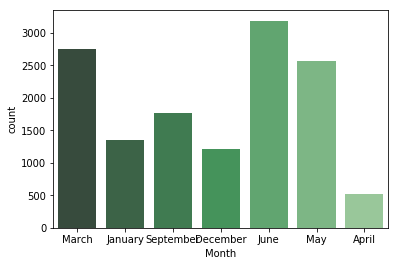

In [12]:
sns.countplot(x="Month", data=data, palette="Greens_d")

From the above figure it can be seen that month of june has highest number of flights taken

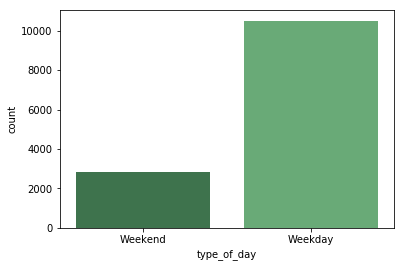

In [13]:
sns.countplot(x="type_of_day", data=data, palette="Greens_d")
plt.show()

Weekday has larger number of flights than weekend

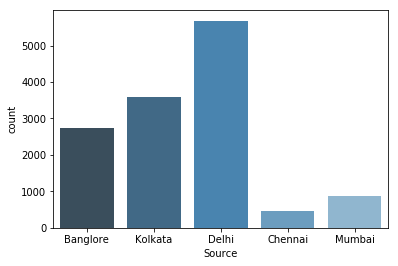

In [14]:
sns.countplot(x='Source',data=data, palette="Blues_d")

Delhi has larger number of flights operations

# Converting the Arrival_Time and Dep_Time in hour

In [15]:
data['arrival hour of the day'] = data["Arrival_Time"].str.split(":", n = 1, expand = True)[0]


In [16]:
data['arrival hour of the day']

0       01
1       13
2       04
3       23
4       21
        ..
2666    20
2667    16
2668    04
2669    19
2670    19
Name: arrival hour of the day, Length: 13354, dtype: object

In [17]:
data['Departure hour of the day'] = data["Dep_Time"].str.split(":", n = 1, expand = True)[0]

In [18]:
data['Departure hour of the day']

0       22
1       05
2       09
3       18
4       16
        ..
2666    20
2667    14
2668    21
2669    04
2670    04
Name: Departure hour of the day, Length: 13354, dtype: object

# Converting the duration in minutes

In [19]:
data['Duration']=  data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [20]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,year,day,type_of_day,arrival hour of the day,Departure hour of the day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897.0,March,2019,Sunday,Weekend,01,22
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662.0,January,2019,Saturday,Weekend,13,05
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882.0,September,2019,Friday,Weekday,04,09
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218.0,December,2019,Thursday,Weekday,23,18
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302.0,January,2019,Thursday,Weekday,21,16


In [21]:
data.drop(['Dep_Time','Arrival_Time','Additional_Info','Date_of_Journey','Route','year'],axis=1,inplace=True)

In [22]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,day,type_of_day,arrival hour of the day,Departure hour of the day
0,IndiGo,Banglore,New Delhi,170,non-stop,3897.0,March,Sunday,Weekend,01,22
1,Air India,Kolkata,Banglore,445,2 stops,7662.0,January,Saturday,Weekend,13,05
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882.0,September,Friday,Weekday,04,09
3,IndiGo,Kolkata,Banglore,325,1 stop,6218.0,December,Thursday,Weekday,23,18
4,IndiGo,Banglore,New Delhi,285,1 stop,13302.0,January,Thursday,Weekday,21,16


# Data Visualisation using BoxPlot

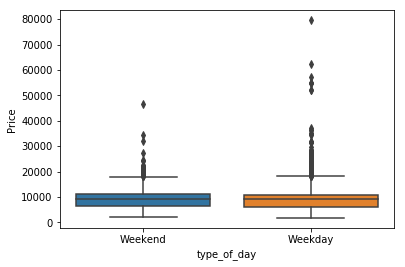

In [23]:
sns.boxplot(x='type_of_day',y='Price',data=data)

>>The price of flights during weekend and weekday  are almost similar

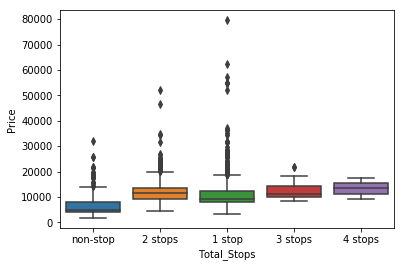

In [24]:
sns.boxplot(x='Total_Stops',y='Price',data=data)

>Higher the number of stops , higher is the price

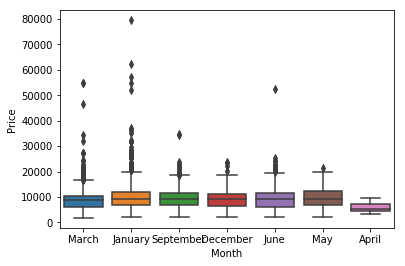

In [25]:
sns.boxplot(x='Month',y='Price',data=data)

>April has lowest flight's price because of non vacation and non festive month

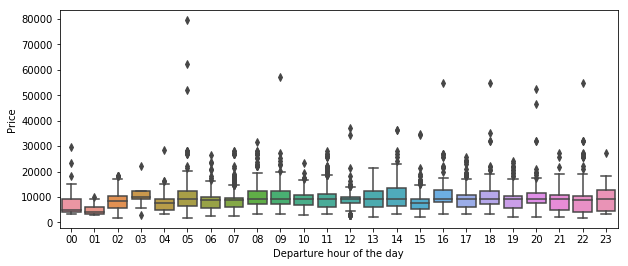

In [26]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Departure hour of the day',y='Price',data=data)

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


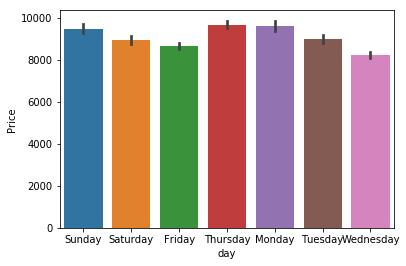

In [27]:
sns.barplot(x='day',y='Price',data=data)
plt.show()

# Encoding the Non Numeric data into Numeric

In [28]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
list1=['Airline','Source','Destination','Total_Stops','Month','day','type_of_day','arrival hour of the day','Departure hour of the day']
for val in list1:
    data[val]=Le.fit_transform(data[val].astype(str))

In [29]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,day,type_of_day,arrival hour of the day,Departure hour of the day
0,3,0,5,170,4,3897.0,4,3,1,1,22
1,1,3,0,445,1,7662.0,2,2,1,13,5
2,4,2,1,1140,1,13882.0,6,0,0,4,9
3,3,3,0,325,0,6218.0,1,4,0,23,18
4,3,0,5,285,0,13302.0,2,4,0,21,16


# Data Visualisation using LinePlot

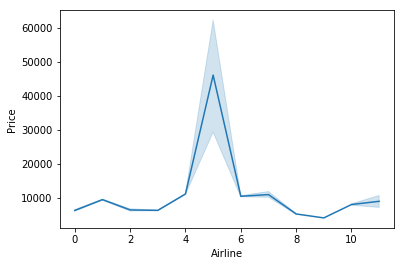

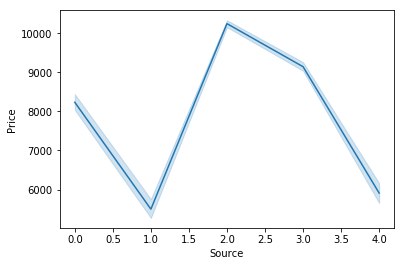

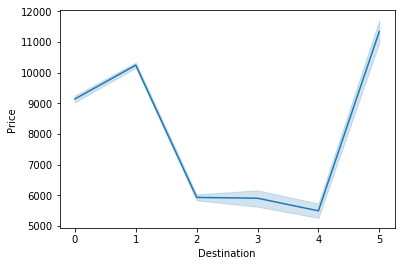

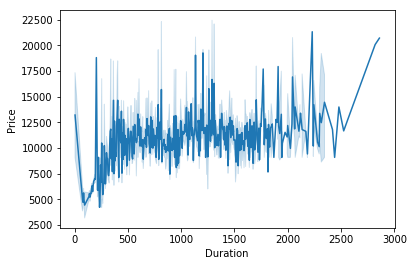

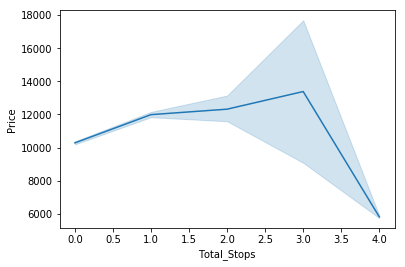

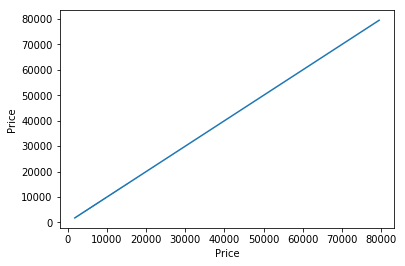

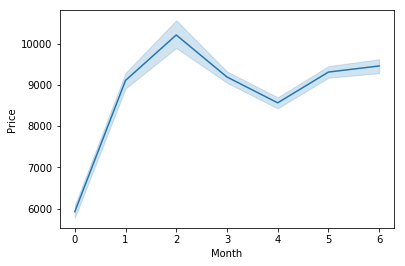

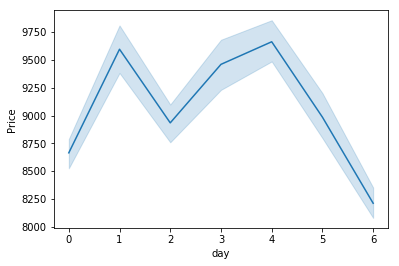

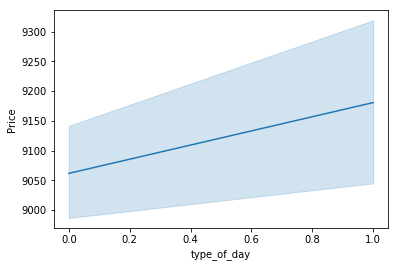

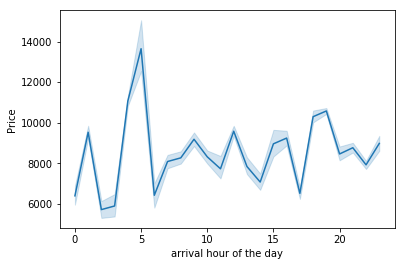

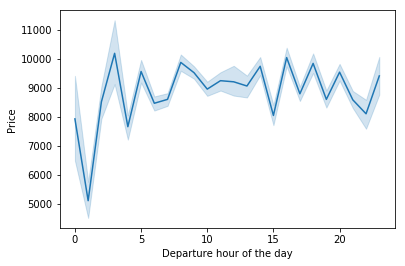

In [30]:
import warnings
warnings.filterwarnings("ignore")
attr=list(data.columns)
plt.figure()
for val in attr:
    sns.lineplot(x=val,y='Price',data=data)
    plt.show()

# CorRelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

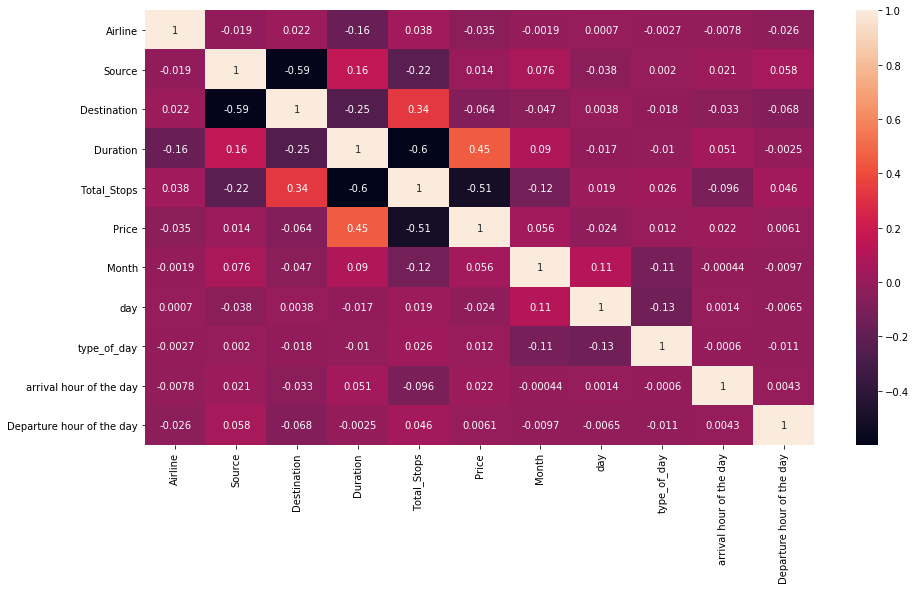

In [31]:
df_cor=data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(df_cor , annot =True)

# Feature selection based on correlation matrix
From the below code I have removed the features which are having correlation of more than 0.9. This results in stable parameter estimates of classification which makes it easy to assess the effect of independent variables on dependent variables

In [32]:
columns = np.full((df_cor.shape[0]),True,dtype=bool)
for i in range(df_cor.shape[0]):
    for j in range(i+1, df_cor.shape[0]):
        if df_cor.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [33]:
data.shape

(13354, 11)

In [34]:
data.skew()

Airline                      0.720924
Source                      -0.424151
Destination                  1.247893
Duration                     0.867883
Total_Stops                  0.639737
Price                        2.026457
Month                       -0.329786
day                         -0.061442
type_of_day                  1.397975
arrival hour of the day     -0.384591
Departure hour of the day    0.109087
dtype: float64

In [35]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [36]:
data.skew()

Airline                     -0.680746
Source                      -0.424151
Destination                  0.283069
Duration                    -0.179667
Total_Stops                  0.474087
Price                       -0.438663
Month                       -0.329786
day                         -0.061442
type_of_day                  1.397975
arrival hour of the day     -0.384591
Departure hour of the day    0.109087
dtype: float64

# Handling Outliers

In [37]:
from  scipy.stats import zscore
zs=np.abs(zscore(data))
zs

array([[0.1748634 , 1.65803232, 1.89945601, ..., 1.91893934, 1.79760208,
        1.65387891],
       [1.47968414, 0.88743964, 1.3019759 , ..., 1.91893934, 0.05743439,
        1.30982886],
       [0.24519505, 0.03894899, 0.06349298, ..., 0.52112121, 1.36256016,
        0.61248585],
       ...,
       [0.24519505, 0.03894899, 0.06349298, ..., 0.52112121, 1.36256016,
        1.47954315],
       [1.47968414, 0.03894899, 0.06349298, ..., 0.52112121, 0.81264945,
        1.48416461],
       [0.87859005, 0.03894899, 0.06349298, ..., 1.91893934, 0.81264945,
        1.48416461]])

In [38]:
df=data[(zs<3).all(axis=1)]
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,day,type_of_day,arrival hour of the day,Departure hour of the day
0,1.386294,0,1.791759,5.141664,1.609438,8.268219,4,3,0.693147,1,22
1,0.693147,3,0.000000,6.100319,0.693147,8.944159,2,2,0.693147,13,5
2,1.609438,2,0.693147,7.039660,0.693147,9.538420,6,0,0.000000,4,9
3,1.386294,3,0.000000,5.786897,0.000000,8.735364,1,4,0.000000,23,18
4,1.386294,0,1.791759,5.655992,0.000000,9.495745,2,4,0.000000,21,16
...,...,...,...,...,...,...,...,...,...,...,...
2666,0.693147,3,0.000000,7.269617,0.000000,9.114717,3,4,0.000000,20,20
2667,1.386294,3,0.000000,5.049856,1.609438,9.114717,4,6,0.000000,16,14
2668,1.609438,2,0.693147,5.981414,0.000000,9.114717,3,1,0.000000,4,21
2669,0.693147,2,0.693147,6.820016,0.000000,9.114717,3,1,0.000000,19,4


In [39]:
print('shape of the data with outliers  ' ,data.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (13354, 11)
shape of the data without  outliers   (13250, 11)


In this section we have treated the outliers with the help of ZSCORE using threshold value as 3 ,The features which are having the zscore value > 3 are treated as outliers and have been removed.

Hence the new shape of the dataset after outliers removal is  (13250, 11) . Now this will be our finalised Dataset for modelling.

# Standard Scaling the data for Normalisation

In [40]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df)

In [41]:
x_df=pd.DataFrame(x)

In [42]:
x_df.shape

(13250, 11)

In [43]:
x_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.168308,-1.659685,1.912618,-1.084769,1.370589,-1.691621,0.252990,0.004376,1.915836,-1.808696,1.660142
1,-1.476367,0.904245,-1.295445,-0.016659,0.100553,-0.173587,-0.977823,-0.482883,1.915836,-0.063687,-1.309129
2,0.252793,0.049602,-0.054397,1.029932,0.100553,1.161012,1.483804,-1.457401,-0.521965,-1.372444,-0.610477
3,-0.168308,0.904245,-1.295445,-0.365865,-0.860193,-0.642500,-1.593230,0.491635,-0.521965,1.390487,0.961490
4,-0.168308,-1.659685,1.912618,-0.511717,-0.860193,1.065171,-0.977823,0.491635,-0.521965,1.099652,0.612164


In [44]:
x_df.columns=[i for i in df.columns]

In [45]:
x_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,day,type_of_day,arrival hour of the day,Departure hour of the day
0,-0.168308,-1.659685,1.912618,-1.084769,1.370589,-1.691621,0.252990,0.004376,1.915836,-1.808696,1.660142
1,-1.476367,0.904245,-1.295445,-0.016659,0.100553,-0.173587,-0.977823,-0.482883,1.915836,-0.063687,-1.309129
2,0.252793,0.049602,-0.054397,1.029932,0.100553,1.161012,1.483804,-1.457401,-0.521965,-1.372444,-0.610477
3,-0.168308,0.904245,-1.295445,-0.365865,-0.860193,-0.642500,-1.593230,0.491635,-0.521965,1.390487,0.961490
4,-0.168308,-1.659685,1.912618,-0.511717,-0.860193,1.065171,-0.977823,0.491635,-0.521965,1.099652,0.612164


# Separating Input/Output Variables

In [46]:
y=x_df['Price']
x=x_df.drop(['Price'],axis=1)

# Applying Various Regression Models
In this section we will be applying several regressor models and hence we will be checking following performance matrix :

1) R2 score

2) Root mean sqaure Error

3) Mean of crossing validation score using R2 as scoring

4) Std Deviation of crossing validation score using R2 as scoring

We have also used GridSearch for tuning the parameters

# Function for R2 Score
This function is built to find the best r2 score depending on the random state while splitting the model. This function prints the best r2 score and returns the random state for that R2 score

In [47]:
from sklearn.model_selection import train_test_split
from  sklearn.metrics import r2_score
def max_r2_score(model,x,y):
    random_state=np.arange(42,101)
    max_r2_score=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        r2_scr=r2_score(test_y,pred)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if r2_scr > max_r2_score:
            max_r2_score=r2_scr
            Final_r_state=r_state
    print('The maximum r2 score reached is {} at random state {}' .format(max_r2_score,Final_r_state))

# Function for RMSE
This function finds the rmse of the model using the random state at best r2 score

In [48]:
from sklearn.model_selection import cross_val_score
def rmse(model,x,y,Final_r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=Final_r_state)
    model.fit(train_x,train_y)
    pred = model.predict(test_x)
    rmse=cross_val_score(model,x,y,cv=10,scoring='neg_mean_squared_error').mean()
    print('mean cross_val_score using RMSE as a scoring parameter',rmse)
    return rmse

Below function is created to make a list of rmse generated by different regressor , so that it can be compared at last, for the selection of the best model

In [49]:
rmse_list=[]
def list_rmse(RMSE):
    rmse_list.append(RMSE)
    return rmse_list

# LINEAR REGRESSION

In [51]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
Final_r_state=max_r2_score(lreg,x,y)

The maximum r2 score reached is 0.4591996491429313 at random state 87


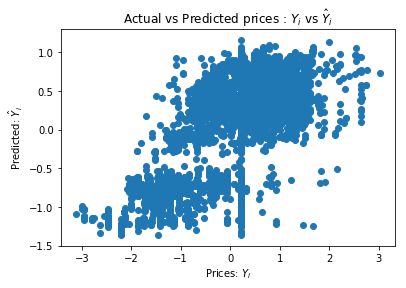

In [57]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=87)
Y_pred = lreg.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted prices : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [53]:
print('mean cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())

mean cross_val_score 0.4151318400488332
std deviation of cross_val_score 0.2077158599583967


In [54]:
RMSE=rmse(lreg,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using RMSE as a scoring parameter -0.587831552818766


# KNeighborsRegressor

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gs=GridSearchCV(knr,neighbors,cv=10)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 7}

In [56]:
knr=KNeighborsRegressor(n_neighbors=7)
Final_r_state=max_r2_score(knr,x,y)

The maximum r2 score reached is 0.5610661893322224 at random state 65


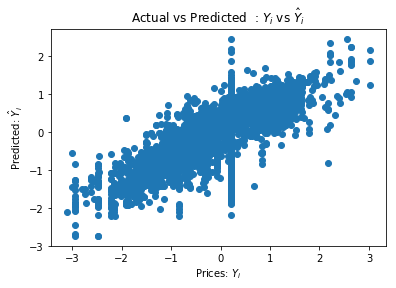

In [58]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=65)
Y_pred = knr.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [59]:
print('mean cross_val_score using R2 as parameter',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(knr,x,y,cv=5,scoring='r2').std())
RMSE=rmse(knr,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter 0.5301612154471428
std deviation of cross_val_score using  R2 as parameter 0.2655205125645769
mean cross_val_score using RMSE as a scoring parameter -0.484120268345384


# 3. Lasso Regression

In [60]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameter={"alpha":[0.001,0.01,0.1,1]}
gs=GridSearchCV(lsreg,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 0.001}

In [61]:
lsreg=Lasso(alpha=0.001)
Final_r_state=max_r2_score(lsreg,x,y)

The maximum r2 score reached is 0.45918876272663744 at random state 87


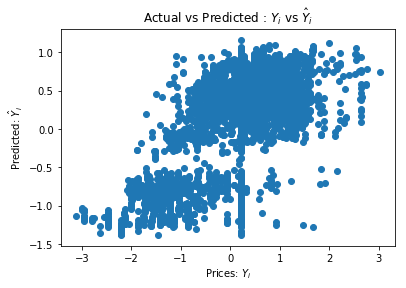

In [62]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=87)
Y_pred = lsreg.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [63]:
print('mean cross_val_score using R2 as parameter',cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())
RMSE=rmse(lsreg,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter 0.4147689843854794
std deviation of cross_val_score using  R2 as parameter 0.20753672782742522
mean cross_val_score using RMSE as a scoring parameter -0.5878180180780308


# 4.DecisionTreeRegressor

In [64]:
from sklearn.tree import DecisionTreeRegressor
depth={'max_depth':range(1,30)}
dt=DecisionTreeRegressor()
gs=GridSearchCV(dt,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 9}

In [65]:
DT=DecisionTreeRegressor(max_depth=9)
Final_r_state=max_r2_score(DT,x,y)

The maximum r2 score reached is 0.6125563563389135 at random state 65


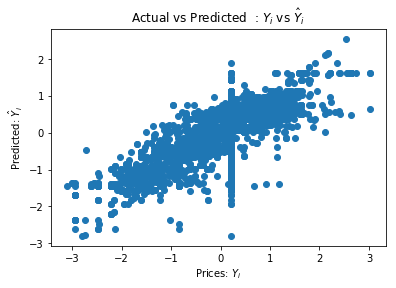

In [66]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=65)
Y_pred = DT.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [67]:
print('mean cross_val_score using R2 as parameter',cross_val_score(DT,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(DT,x,y,cv=5,scoring='r2').std())
RMSE=rmse(DT,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter 0.5689136497506257
std deviation of cross_val_score using  R2 as parameter 0.2844255450477583
mean cross_val_score using RMSE as a scoring parameter -0.43617009730196143


# Appying ensemble model for better results

# 1.GradientBoostingRegressor

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
gbr=GradientBoostingRegressor()
gs=GridSearchCV(gbr,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [69]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000)
Final_r_state=max_r2_score(gbr,x,y)

The maximum r2 score reached is 0.6550439379326585 at random state 65


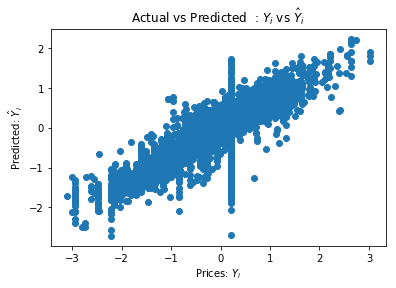

In [70]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=65)
Y_pred = gbr.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [71]:
print('mean cross_val_score using R2 as parameter',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())
RMSE=rmse(gbr,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter 0.6081597163906688
std deviation of cross_val_score using  R2 as parameter 0.3043762572389469
mean cross_val_score using RMSE as a scoring parameter -0.3985506303068366


# 2.AdaBoostRegressor

In [72]:
from sklearn.ensemble import AdaBoostRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DT,knr]}
ad=AdaBoostRegressor()
gs=GridSearchCV(ad,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 0.001,
 'n_estimators': 100}

In [73]:
ad=AdaBoostRegressor(learning_rate=0.001,n_estimators=100,base_estimator=DT)
Final_r_state=max_r2_score(ad,x,y)

The maximum r2 score reached is 0.6417798643546664 at random state 65


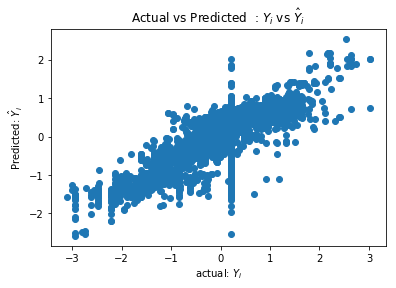

In [74]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=65)
Y_pred = ad.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show() 

In [75]:
print('mean cross_val_score using R2 as parameter',cross_val_score(ad,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(ad,x,y,cv=5,scoring='r2').std())
RMSE=rmse(ad,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter 0.586457158495375
std deviation of cross_val_score using  R2 as parameter 0.2930581133171808
mean cross_val_score using RMSE as a scoring parameter -0.4211141515689807


# XGBRegressor

In [58]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'gamma':[10,100,500,1000]}
xgb = XGBRegressor(silent=True)
gs=GridSearchCV(xgb,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'gamma': 10, 'learning_rate': 1}

In [60]:
xgb=XGBRegressor(learning_rate=1,gamma=10,silent=True)
Final_r_state=max_r2_score(xgb,x,y)

The maximum r2 score reached is 0.6068152138671439 at random state 81


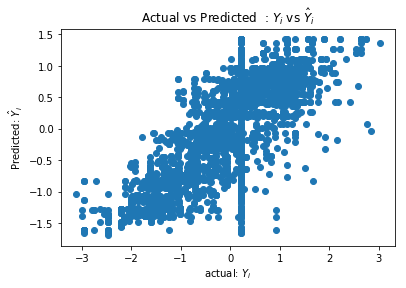

In [61]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=81)
Y_pred = xgb.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show() 

In [62]:
print('mean cross_val_score using R2 as parameter',cross_val_score(xgb,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(xgb,x,y,cv=5,scoring='r2').std())
RMSE=rmse(xgb,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter 0.5489272454839693
std deviation of cross_val_score using  R2 as parameter 0.274729161124353
mean cross_val_score using RMSE as a scoring parameter -0.4474878435558788


# RandomForestRegressor

In [63]:
from sklearn.ensemble import RandomForestRegressor
parameter={'max_depth':range(1,30),'n_estimators':[10,100,500,1000]}
RF = RandomForestRegressor()
gs=GridSearchCV(RF,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 11, 'n_estimators': 1000}

In [64]:
RF = RandomForestRegressor(max_depth=11,n_estimators=1000)
Final_r_state=max_r2_score(RF,x,y)

The maximum r2 score reached is 0.6506914109486104 at random state 65


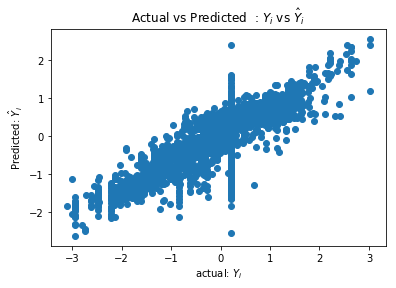

In [65]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=65)
Y_pred = RF.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show() 

# Final Model --RandomForestRegressor

In [ ]:
RF = RandomForestRegressor(max_depth=11,n_estimators=1000)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=65)
RF.fit(train_x,train_y)
pred = RF.predict(test_x)
r2_scr=r2_score(test_y,pred)

In [67]:
from sklearn.metrics import mean_squared_error
print('RMSE',np.sqrt(mean_squared_error(test_y,pred)))
print('r2_score',r2_score(test_y,pred))
print('mean cross_val_score',cross_val_score(RF,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(RF,x,y,cv=5,scoring='r2').std())

RMSE 0.5907697763804857
r2_score 0.6506323049709073
mean cross_val_score 0.5971934610304637
std deviation of cross_val_score 0.29887290830774654


After performing several regressor models on this data set and after analysing the performance matrix for all the models , it is concluded that RandomForestRegressor is giving the best results which are as follows :

RMSE 0.5907697763804857

r2_score 0.6506323049709073

mean cross_val_score 0.5971934610304637

std deviation of cross_val_score 0.29887290830774654

Therefore RandomForestRegressor is selected as our final model

In [68]:
from sklearn.externals import joblib
joblib.dump(RF,"rf_flight_price.pkl")

['rf_flight_price.pkl']

# Conclusion

This project is about predicting the price of the flights .This project becomes a regressor problem as the price of the is real valued feature.

The price of the flights depends various fetaures which have been taken up in this dataset .For example the flights with zero stop will have different price and the price with 1 or more than stopes will have differenrt prices ,
Therefore I have visualised the dataset using various plots which helped me in deciding the efficient feature which contributes significantly the prices.

So as per the work ,we have performed the null value analysis , EDA and aslo handled the outliers .

In the last section of the work , we have used several regressor models for the prediction and based on the performance matrix we have selected RandomForestRegressor as our Final model. as r2 score for this is maximum .

At last we have saved the final model using joblib.